In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("boston_housing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df_x=df
df_y=df.price
print(df_y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


In [5]:
#Initialize the linear regression model
reg=linear_model.LinearRegression()

In [6]:
x_train , x_test , y_train , y_test = train_test_split(df_x , df_y , test_size=0.2 , random_state=42)

In [7]:
reg.fit(x_train,y_train)

LinearRegression()

In [8]:

#print our price predictions on our test data
y_pred = reg.predict(x_test)
print(y_pred)

[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9 35.4 15.2 26.5 43.5 21.2
 18.4 28.5 23.9 18.5 25.  35.4 31.5 20.2 24.1 20.  13.1 24.8 30.8 12.7
 20.  23.7 10.8 20.6 20.8  5.  20.1 48.5 10.9  7.  20.9 17.2 20.9  9.7
 19.4 29.  16.4 25.  25.  17.1 23.2 10.4 19.6 17.2 27.5 23.  50.  17.9
  9.6 17.2 22.5 21.4]


In [9]:
y_pred[0]

23.599999999999987

In [10]:

#actual value
y_test[0]

24.0

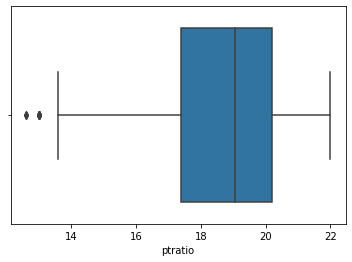

In [11]:
sns.boxplot(x=df['ptratio'])
plt.show()


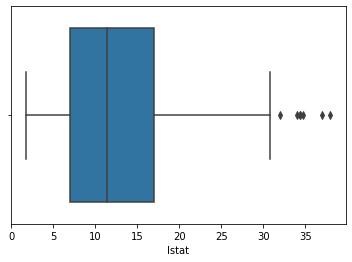

In [12]:
sns.boxplot(x=df['lstat'])
plt.show()

In [13]:
def RemoveOutlier(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    high, low = Q3 + 1.5 * IQR, Q1 - 1.5 * IQR
    print("Highest allowed in variable:", var, high)
    print("lowest allowed in variable:", var, low)
    count = df[(df[var] > high) | (df[var] < low)][var].count()
    print('Total outliers in:', var, ':', count)
    df = df[((df[var] >= low) & (df[var] <= high))]
    return df

In [14]:
df = RemoveOutlier(df, 'ptratio')
df = RemoveOutlier(df, 'lstat')

Highest allowed in variable: ptratio 24.4
lowest allowed in variable: ptratio 13.199999999999998
Total outliers in: ptratio : 15
Highest allowed in variable: lstat 32.09250000000001
lowest allowed in variable: lstat -7.847500000000005
Total outliers in: lstat : 6


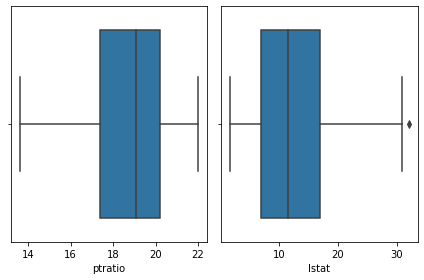

In [15]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=df, x='ptratio', ax=axes[0])
sns.boxplot(data=df, x='lstat', ax=axes[1])
fig.tight_layout()
plt.show()